In [2]:
import pandas as pd
import numpy as np 
from tabulate import tabulate

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

## 1) Carregar os dados de treinamento e teste

In [3]:
# Carregar os dados de treinamento e teste
X_train = pd.read_csv('../Dados/ModelosSimples/X_train.csv')
y_train = pd.read_csv('../Dados/ModelosSimples/y_train.csv')
X_test = pd.read_csv('../Dados/ModelosSimples/X_test.csv')
y_test = pd.read_csv('../Dados/ModelosSimples/y_test.csv')

# Converter y_train e y_test em vetores 1D
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

## 2) Treinando modelo 

In [4]:
param_grid = {
    'priors': [None, [0.3, 0.4, 0.3], [0.2, 0.6, 0.2], [0.4, 0.3, 0.3]],
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

model = GaussianNB()

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'priors': [None, [0.3, 0.4, 0.3], [0.2, 0.6, 0.2],
                                    [0.4, 0.3, 0.3]],
                         'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             return_train_score=True, scoring='accuracy')

### 2.1) Analisando todas combinações

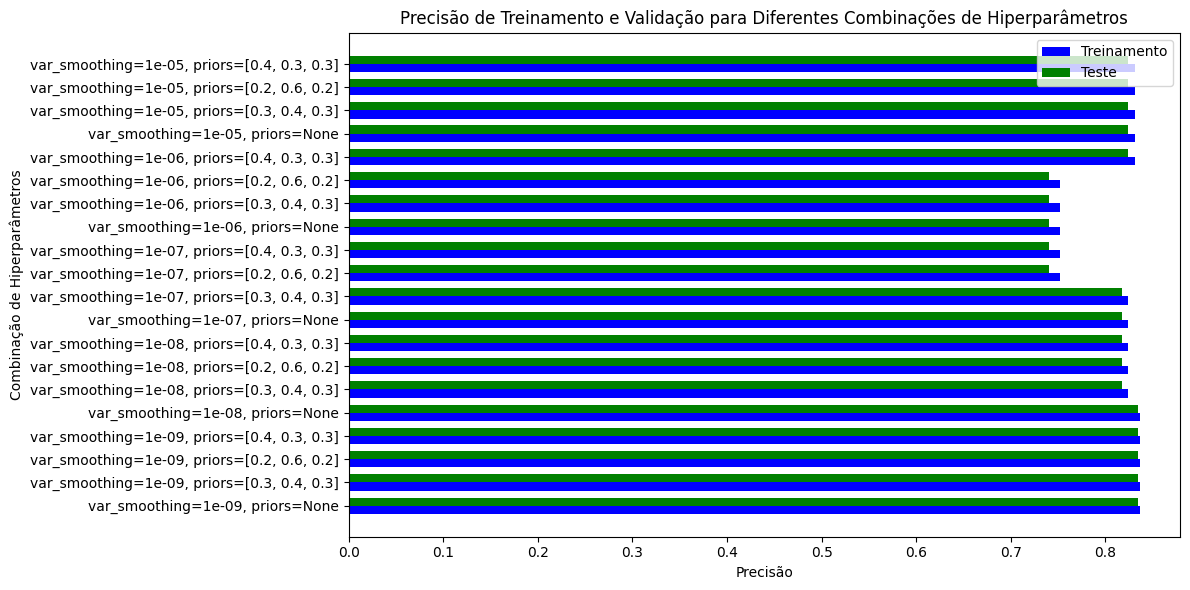

In [5]:
results = grid_search.cv_results_

param_combinations = [f'var_smoothing={var_smoothing}, priors={priors}' 
                      for var_smoothing in param_grid['var_smoothing'] 
                      for priors in param_grid['priors']]

train_scores = results['mean_train_score']

validations_scores = results['mean_test_score']

y_indices = np.arange(len(param_combinations))

bar_height = 0.35

plt.figure(figsize=(12, 6))
plt.barh(y_indices, train_scores, height=bar_height, label='Treinamento', color='b', align='center')
plt.barh(y_indices + bar_height, validations_scores, height=bar_height, label='Teste', color='g', align='center')

plt.ylabel('Combinação de Hiperparâmetros')
plt.xlabel('Precisão')
plt.title('Precisão de Treinamento e Validação para Diferentes Combinações de Hiperparâmetros')
plt.yticks(y_indices + bar_height / 2, param_combinations)
plt.legend()
plt.tight_layout()

plt.show()

### 2.2) Analisando Cada combinação para var_smoothing

In [6]:

# # Extrair os resultados do GridSearchCV
# results = grid_search.cv_results_

# # Valores únicos de var_smoothing
# var_smoothing_values = param_grid['var_smoothing']

# # Precisões obtidas no treinamento (média de validação cruzada)
# train_scores = results['mean_train_score']

# # Precisões obtidas no teste (média de validação cruzada)
# test_scores = results['mean_test_score']

# # Número de combinações de hiperparâmetros
# n_combinations = len(param_grid['priors']) * len(var_smoothing_values)

# # Largura das barras
# bar_width = 0.35

# # Loop para criar gráficos separados para cada var_smoothing
# for i, var_smoothing in enumerate(var_smoothing_values):
#     plt.figure(figsize=(12, 6))
    
#     # Índices para o eixo x
#     x_indices = np.arange(len(param_grid['priors']))
    
#     # Precisões correspondentes de treinamento e teste para este var_smoothing
#     train_scores_var_smoothing = train_scores[i::n_combinations]
#     test_scores_var_smoothing = test_scores[i::n_combinations]
    
#     # Rótulos para as combinações de hiperparâmetros
#     labels = [f'priors={priors}' for priors in param_grid['priors']]
    
#     plt.bar(x_indices, train_scores_var_smoothing, width=bar_width, label='Treinamento', color='b', align='center')
#     plt.bar(x_indices + bar_width, test_scores_var_smoothing, width=bar_width, label='Teste', color='g', align='center')
    
#     plt.xlabel('Combinação de Hiperparâmetros')
#     plt.ylabel('Precisão')
#     plt.title(f'Precisão de Treinamento e Teste para var_smoothing={var_smoothing}')
#     plt.xticks(x_indices + bar_width / 2, labels, rotation=45)
#     plt.legend()
#     plt.tight_layout()

#     plt.show()

### 2.3) Tabela comparativa para todas combinações

In [7]:
results = grid_search.cv_results_
param_combinations = [f'{params}' for params in grid_search.cv_results_['params']]
train_scores = results['mean_train_score']
test_scores = results['mean_test_score']

table_data = []

for i in range(len(param_combinations)):
    row = [i+1, param_combinations[i], train_scores[i], test_scores[i]]
    table_data.append(row)

table = tabulate(table_data, headers=['Combinação', 'Hiperparâmetros', 'Train Score', 'Validation Score'], tablefmt='fancy_grid', numalign='left')

print(table)

# # Crie um DataFrame a partir dos dados da tabela
# df = pd.DataFrame(table_data, columns=['Combinação', 'Hiperparâmetros', 'Train Score', 'Validation Score'])

# # Salve o DataFrame em um arquivo CSV
# df.to_csv('resultados.csv', index=False)  # Isso salvará os dados em um arquivo CSV chamado 'resultados.csv'

╒══════════════╤═════════════════════════════════════════════════════╤═══════════════╤════════════════════╕
│ Combinação   │ Hiperparâmetros                                     │ Train Score   │ Validation Score   │
╞══════════════╪═════════════════════════════════════════════════════╪═══════════════╪════════════════════╡
│ 1            │ {'priors': None, 'var_smoothing': 1e-09}            │ 0.837143      │ 0.834286           │
├──────────────┼─────────────────────────────────────────────────────┼───────────────┼────────────────────┤
│ 2            │ {'priors': None, 'var_smoothing': 1e-08}            │ 0.837143      │ 0.834286           │
├──────────────┼─────────────────────────────────────────────────────┼───────────────┼────────────────────┤
│ 3            │ {'priors': None, 'var_smoothing': 1e-07}            │ 0.837143      │ 0.834286           │
├──────────────┼─────────────────────────────────────────────────────┼───────────────┼────────────────────┤
│ 4            │ {'priors': 

## 3) Predição para o melhor modelo

In [8]:
best_naive_bayes = grid_search.best_estimator_

y_pred = best_naive_bayes.predict(X_test)

### 3.1) Matriz Confusão

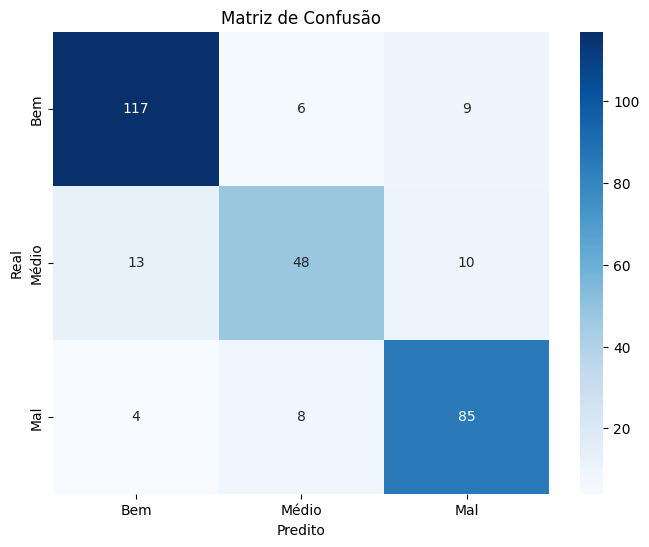

In [9]:
cm = confusion_matrix(y_test, y_pred)  

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Bem', 'Médio', 'Mal'], yticklabels=['Bem', 'Médio', 'Mal'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

### 3.2) Métricas de eficácia

In [10]:
print(f'Melhores Hiperparâmetros Encontrados: {grid_search.best_params_}')

print("----------------------------------------------------------------\n")
accuracy = accuracy_score(y_test, y_pred)  
print(f'Acurácia do teste: {accuracy}')

print("----------------------------------------------------------------\n")
classification_rep = classification_report(y_test, y_pred)
print(f'Relatório de Classificação:\n{classification_rep}')

# precision = precision_score(y_test, y_pred)  # Substitua y_test e y_pred pelos seus dados reais e previstos
# print(f'Precisão: {precision}')

# recall = recall_score(y_test, y_pred)  # Substitua y_test e y_pred pelos seus dados reais e previstos
# print(f'Recall: {recall}')

# f1 = f1_score(y_test, y_pred)  # Substitua y_test e y_pred pelos seus dados reais e previstos
# print(f'Medida F: {f1}')

Melhores Hiperparâmetros Encontrados: {'priors': None, 'var_smoothing': 1e-09}
----------------------------------------------------------------

Acurácia do teste: 0.8333333333333334
----------------------------------------------------------------

Relatório de Classificação:
              precision    recall  f1-score   support

         Bem       0.87      0.89      0.88       132
         Mal       0.77      0.68      0.72        71
       Médio       0.82      0.88      0.85        97

    accuracy                           0.83       300
   macro avg       0.82      0.81      0.82       300
weighted avg       0.83      0.83      0.83       300

